# Titolo

In [ ]:
"""
    Pappalardo, L., Vanhoof, M., Gabrielli, L., Smoreda, Z., Pedreschi, D., & Giannotti, F. (2016). 
    An analytical framework to nowcast well-being using mobile phone data. 
    International Journal of Data Science and Analytics, 1-18.
"""

## Installing and importing packages

In [ ]:
wants <- c("randomForest","caret", "paran", "e1071", "usdm", "relaimpo","car","pbkrtest","SDMTools","nlme","gnm","rpud")
has   <- wants %in% rownames(installed.packages())
if(any(!has)) install.packages(wants[!has])
options(warn=-1)

In [ ]:
library(randomForest)
library(caret)
require(e1071)
require(relaimpo)
require(car)
require(usdm)
library(SDMTools)
library(randomForest)
require(stats)
require(gnm)
require(nlme)

## Reading data

### Original dataset - delete this block before deliver code

In [8]:
data=read.csv("E:\\Lavoro\\Dottorato\\paper\\VLDB2015\\data\\municipality2measures_100_0.csv",header=TRUE, sep=";", dec=".")
municipalities=read.csv('E:\\Lavoro\\Dottorato\\paper\\VLDB2015\\data\\municipalities.csv',header=TRUE, sep=";", dec=".")

#merging dataset
residents=municipalities[,c("id_municipality","residents","orange_users")]
data=merge(data,residents,by="id_municipality")
data$total_income_per_capita=data$total_income/data$residents
data$area=data$residents/data$density
data=data[data$residents>1000,]

#get data for regression step
deprivation_index=data$deprivation_index
density=data$density
entropy=data$mean_entropy
dsocial=data$mean_dsocial
rg=data$mean_rg
degree=data$mean_degree
residents=data$residents
area=data$area
total_income_per_capita=data$total_income_per_capita

DI=deprivation_index
PCI=total_income_per_capita
PD=density
MD=entropy
SD=dsocial
MV=rg
SV=degree

data.deprivation=data.frame(DI,PD,MD,MV,SV,SD)
data.income=data.frame(PCI,PD,MD,MV,SV,SD)

write.table(data.deprivation, file = "../data/data_out/deprivation.csv", append = FALSE, quote = TRUE, sep = ";",
            eol = "\n", na = "NA", dec = ".", row.names = FALSE,
            col.names = TRUE, qmethod = c("escape", "double"),
            fileEncoding = "UTF-8")
write.table(data.income, file = "../data/data_out/income.csv", append = FALSE, quote = TRUE, sep = ";",
            eol = "\n", na = "NA", dec = ".", row.names = FALSE,
            col.names = TRUE, qmethod = c("escape", "double"),
            fileEncoding = "UTF-8")

In [9]:
data.income=read.csv('../data/data_out/income.csv',header=TRUE, sep=";", dec=".")
data.deprivation=read.csv('../data/data_out/deprivation.csv',header=TRUE, sep=";", dec=".")

In [3]:
#output
v=""
prefix=paste("E:\\",sep="",v)
file=paste(prefix,"result.txt",sep="")
sink(file, append=FALSE, split=FALSE)

### Fitting: 
    this module allow us to measure the correlation among mobile phone measures and well-being indicator

#### Deprivation Index

In [10]:
#linear
fit_dpi=lm( DI ~ log10(PD) + MD + MV + SV +SD, data=data.deprivation) 
summary(fit_dpi)
print ('-------------------')
#non-linear gnm
formula=DI ~ log10(PD) + MD + MV + SV +SD
fit_not_linear= gnm(formula,data = data.deprivation)
print (paste('Residual standard error for gnm model ',sqrt(deviance(fit_not_linear)/df.residual(fit_not_linear))))
summary(fit_not_linear)
print ('-------------------')
#non-linear nls
fit_not_linear <- nls(DI ~ p1*log10(PD) + p2*MD +  p3*MV  + p4*SV + p5*SD 
                      ,data=data.deprivation, start = c(p1 = 0.1, p2 = 0.1, p3=0.1,p4 = 0.1, p5 = 0.1), 
                      trace = TRUE)
summary(fit_not_linear)


Call:
lm(formula = DI ~ log10(PD) + MD + MV + SV + SD, data = data.deprivation)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80067 -0.14587 -0.00253  0.13991  0.96894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.0787147  0.1281856  31.819  < 2e-16 ***
log10(PD)    0.2479372  0.0059061  41.980  < 2e-16 ***
MD          -2.9807454  0.0575328 -51.809  < 2e-16 ***
MV           0.0023337  0.0002871   8.129 5.35e-16 ***
SV           0.0067924  0.0027324   2.486    0.013 *  
SD          -2.1532641  0.2027357 -10.621  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2198 on 5182 degrees of freedom
Multiple R-squared:  0.4267,	Adjusted R-squared:  0.4261 
F-statistic: 771.3 on 5 and 5182 DF,  p-value: < 2.2e-16


[1] "-------------------"
[1] "Residual standard error for gnm model  0.21983571751993"



Call:
gnm(formula = formula, data = data.deprivation)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.800670  -0.145870  -0.002527   0.139908   0.968937  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.0787147  0.1281856  31.819   <2e-16 ***
log10(PD)    0.2479372  0.0059061  41.980   <2e-16 ***
MD          -2.9807454  0.0575328 -51.809   <2e-16 ***
MV           0.0023337  0.0002871   8.129   <2e-16 ***
SV           0.0067924  0.0027324   2.486    0.013 *  
SD          -2.1532641  0.2027357 -10.621   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.04832774)

Residual deviance: 250.43 on 5182 degrees of freedom
AIC: -987.44

Number of iterations: 2


[1] "-------------------"
53452.07 :  0.1 0.1 0.1 0.1 0.1
299.3631 :   0.307181298 -2.539257203  0.003179583 -0.030311580  3.900000816



Formula: DI ~ p1 * log10(PD) + p2 * MD + p3 * MV + p4 * SV + p5 * SD

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
p1  0.3071813  0.0061275   50.13   <2e-16 ***
p2 -2.5392572  0.0610400  -41.60   <2e-16 ***
p3  0.0031796  0.0003125   10.18   <2e-16 ***
p4 -0.0303116  0.0027015  -11.22   <2e-16 ***
p5  3.9000008  0.0766029   50.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2403 on 5183 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 2.074e-07


#### Per capita income

In [11]:
#linear
fit_income=lm( PCI ~  log10(PD) + MD + MV + SV +SD, data=data.income) 
summary(fit_income)
print ('-------------------')
#non-linear
formula=PCI ~  log10(PD) + MD + MV + SV +SD
fit_not_linear= gnm(formula,data = data.income)
print (paste('Residual standard error for gnm model ',sqrt(deviance(fit_not_linear)/df.residual(fit_not_linear))))
summary(fit_not_linear)
print ('-------------------')
fit_not_linear <- nls(PCI ~ p1*log10(PD) + p2*MD +  p3*MV  + p4*SD + p5*SV ,
                      data = data, start = c(p1 = 0.1, p2 = 0.1, p3=0.1, p4 = 0.1, p5 = 0.1), trace = TRUE)
summary(fit_not_linear)



Call:
lm(formula = PCI ~ log10(PD) + MD + MV + SV + SD, data = data.income)

Residuals:
   Min     1Q Median     3Q    Max 
-10899  -1581   -357   1089  36120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18933.656   1624.361 -11.656  < 2e-16 ***
log10(PD)      781.947     74.842  10.448  < 2e-16 ***
MD           22773.471    729.053  31.237  < 2e-16 ***
MV              63.116      3.638  17.350  < 2e-16 ***
SV             191.116     34.625   5.520 3.56e-08 ***
SD           18451.798   2569.055   7.182 7.82e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2786 on 5182 degrees of freedom
Multiple R-squared:  0.2534,	Adjusted R-squared:  0.2527 
F-statistic: 351.9 on 5 and 5182 DF,  p-value: < 2.2e-16


[1] "-------------------"
[1] "Residual standard error for gnm model  2785.7448818112"



Call:
gnm(formula = formula, data = data.income)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10899.0   -1581.4    -357.3    1088.5   36119.8  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18933.656   1624.361 -11.656  < 2e-16 ***
log10(PD)      781.947     74.842  10.448  < 2e-16 ***
MD           22773.471    729.053  31.237  < 2e-16 ***
MV              63.116      3.638  17.350  < 2e-16 ***
SV             191.116     34.625   5.520 3.56e-08 ***
SD           18451.798   2569.055   7.182 7.82e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 7760375)

Residual deviance: 4.0214e+10 on 5182 degrees of freedom
AIC: 97036

Number of iterations: 2


[1] "-------------------"


Warning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -Inf

882643280633 :  0.1 0.1 0.1 0.1 0.1
41268615442 :    506.93152 20724.06008    59.18912 -9647.85267   363.35561



Formula: PCI ~ p1 * log10(PD) + p2 * MD + p3 * MV + p4 * SD + p5 * SV

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
p1   506.932     71.943   7.046 2.08e-12 ***
p2 20724.060    716.680  28.917  < 2e-16 ***
p3    59.189      3.669  16.133  < 2e-16 ***
p4 -9647.853    899.406 -10.727  < 2e-16 ***
p5   363.356     31.718  11.456  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2822 on 5183 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 1.538e-07


### Relative importance:
    measuring the relative importance of indipendent variables

#### Deprivation index

Response variable: DI 
Total response variance: 0.08421144 
Analysis based on 5188 observations 

5 Regressors: 
log10(PD) MD MV SV SD 
Proportion of variance explained by model: 42.67%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                  lmg        last        first        pratt
log10(PD) 0.369099910 0.380496859 0.3722816814  0.397766914
MD        0.538892177 0.579544070 0.4790017159  0.530961419
MV        0.007017785 0.014269044 0.0008078751  0.003214199
SV        0.012225091 0.001334222 0.0183796422 -0.006347137
SD        0.072765038 0.024355806 0.1295290854  0.074404605

Average coefficients for different model sizes: 

                     1X           2Xs          3Xs          4Xs          5Xs
log10(PD)  0.1682892301  0.1891604358  0.208231522  0.227317145  0.247937177
MD        -1.9501618260 -2.3052710871 -2.574298851 -2.788720929 -2.980745421
MV         0.0004253921  0.0006377976  0.001069293  0.001655317  0.002333707
SV        -

Response variable: DI 
Total response variance: 0.08421144 
Analysis based on 5188 observations 

5 Regressors: 
log10(PD) MD MV SV SD 
Proportion of variance explained by model: 42.67%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                  lmg        last        first        pratt
log10(PD) 0.369099910 0.380496859 0.3722816814  0.397766914
MD        0.538892177 0.579544070 0.4790017159  0.530961419
MV        0.007017785 0.014269044 0.0008078751  0.003214199
SV        0.012225091 0.001334222 0.0183796422 -0.006347137
SD        0.072765038 0.024355806 0.1295290854  0.074404605

Average coefficients for different model sizes: 

                     1X           2Xs          3Xs          4Xs          5Xs
log10(PD)  0.1682892301  0.1891604358  0.208231522  0.227317145  0.247937177
MD        -1.9501618260 -2.3052710871 -2.574298851 -2.788720929 -2.980745421
MV         0.0004253921  0.0006377976  0.001069293  0.001655317  0.002333707
SV        -

ERROR: Error in paste(prefix, "rela_impo_dpi.png", sep = ""): oggetto "prefix" non trovato


null device 
          1

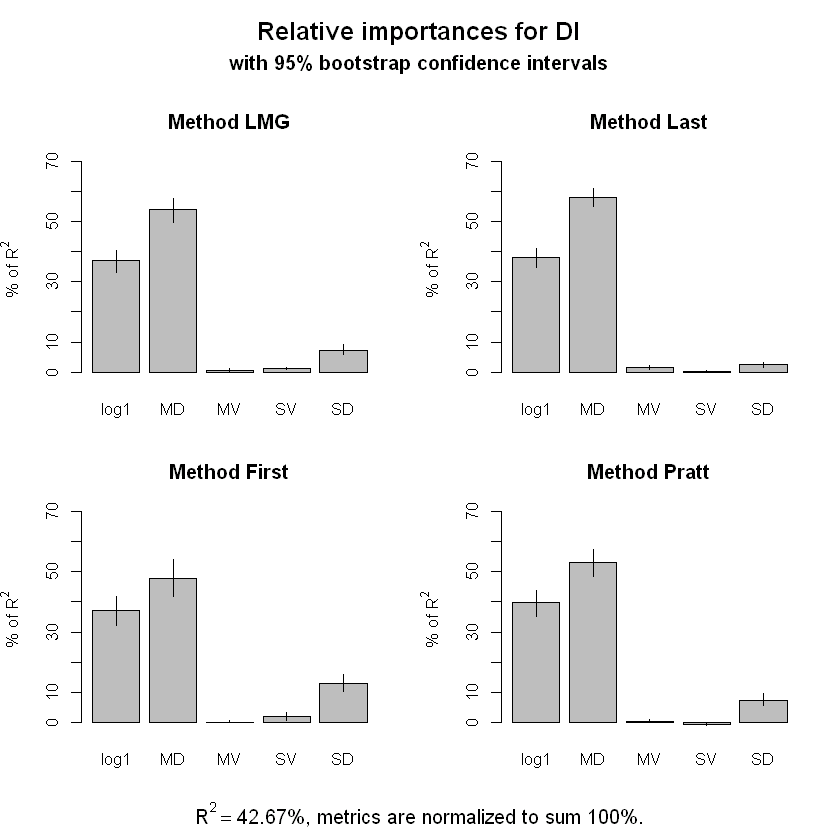

In [12]:
calc.relimp(fit_dpi,type=c("lmg","last","first","pratt"), rela=TRUE)

# Bootstrap Measures of Relative Importance
boot <- boot.relimp(fit_dpi, type = c("lmg", "last", "first", "pratt"), rank = TRUE, diff = TRUE, rela = TRUE)
booteval.relimp(boot) # print result
png(filename=paste(prefix, "rela_impo_dpi.png",sep=""))
par(mfrow=c(2,2))
plot(booteval.relimp(boot)) # plot result
dev.off()

#### Per capita income

Response variable: PCI 
Total response variance: 10384951 
Analysis based on 5188 observations 

5 Regressors: 
log10(PD) MD MV SV SD 
Proportion of variance explained by model: 25.34%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                 lmg       last       first      pratt
log10(PD) 0.12034013 0.07436003 0.151092130 0.11298069
MD        0.64707405 0.66467984 0.671234801 0.67887670
MV        0.17646515 0.20506653 0.167632011 0.17702123
SV        0.02379890 0.02075353 0.004545348 0.01255513
SD        0.03232177 0.03514007 0.005495711 0.01856626

Average coefficients for different model sizes: 

                   1X         2Xs         3Xs         4Xs         5Xs
log10(PD)  1110.27596  1031.61984   968.09561   891.16468   781.94681
MD        23907.20872 24167.43668 24033.54107 23531.81853 22773.47067
MV           63.45785    63.16287    63.76314    63.91365    63.11574
SV           73.46153   151.91460   188.02962   196.27553   191.11635


Response variable: PCI 
Total response variance: 10384951 
Analysis based on 5188 observations 

5 Regressors: 
log10(PD) MD MV SV SD 
Proportion of variance explained by model: 25.34%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                 lmg       last       first      pratt
log10(PD) 0.12034013 0.07436003 0.151092130 0.11298069
MD        0.64707405 0.66467984 0.671234801 0.67887670
MV        0.17646515 0.20506653 0.167632011 0.17702123
SV        0.02379890 0.02075353 0.004545348 0.01255513
SD        0.03232177 0.03514007 0.005495711 0.01856626

Average coefficients for different model sizes: 

                   1X         2Xs         3Xs         4Xs         5Xs
log10(PD)  1110.27596  1031.61984   968.09561   891.16468   781.94681
MD        23907.20872 24167.43668 24033.54107 23531.81853 22773.47067
MV           63.45785    63.16287    63.76314    63.91365    63.11574
SV           73.46153   151.91460   188.02962   196.27553   191.11635


ERROR: Error in paste(prefix, "rela_impo_income.png", sep = ""): oggetto "prefix" non trovato


null device 
          1

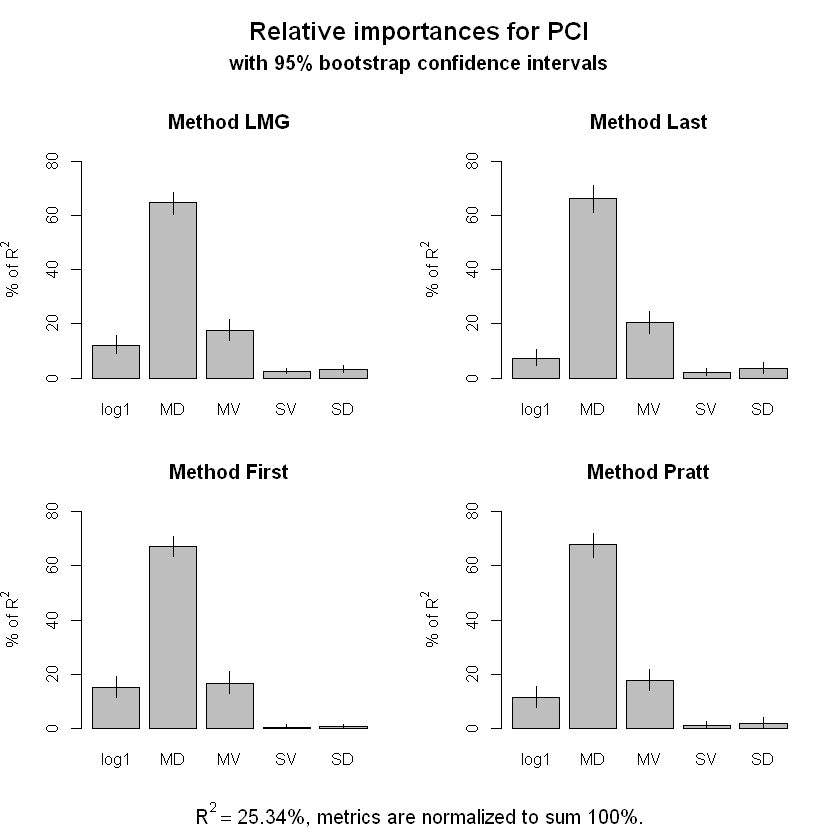

In [13]:
calc.relimp(fit_income,type=c("lmg","last","first","pratt"), rela=TRUE)

# Bootstrap Measures of Relative Importance
boot <- boot.relimp(fit_income, type = c("lmg", "last", "first", "pratt"), rank = TRUE, diff = TRUE, rela = TRUE)
booteval.relimp(boot) # print result
png(filename=paste(prefix, "rela_impo_income.png",sep=""))
par(mfrow=c(2,2))
plot(booteval.relimp(boot)) # plot result
dev.off()

### Validating model accuray using a cross validation procedure

In [17]:
iterations=5
adj_r_squared=1:iterations
rmse=1:iterations
cv_rmse=1:iterations
nrow_data=nrow(data)

op=1
if (1==op){
data=data.deprivation
y="DI"
}

if (2==op)
{
y="PCI"
data=data.income
}

fit_models=list()
prefix=paste("E:\\",y,sep="")
for (j in 1:iterations){
	data=data[sample(nrow_data),]
	divisione_train_test=round(nrow_data*0.60)
	train=data[1:divisione_train_test-1,c(y,"PD","MD","MV","SD","SV")]
	test=data[divisione_train_test:nrow_data,c(y,"PD","MD","MV","SD","SV")]

	PD=train$PD
	MD=train$MD
	MV=train$MV
	SD=train$SD
	SV=train$SV
	y_=train[,c(y)]
	fit=lm( y_ ~ log10(PD) + MD + MV + SV +SD , data=train)

	adj_r_squared[j]=summary(fit)$adj.r.squared
	test_predict=predict(fit,test)
	test_predict=merge(test,test_predict, by="row.names")

	sum=0
	for(i in 1:nrow(test_predict)){
		sum=sum+( test_predict[i,][,c(y)]-test_predict[i,]$y)^2
	}
	sum=sum/nrow(test)
	rmse[j]=sqrt(sum)
	cv_rmse[j]=sqrt(sum)/ mean(test_predict[,c(y)])
    if (y=="DI")
    {
        fit_models$deprivation_index=fit
    }
    if (y=="PCI")
    {
        fit_models$total_income_per_capita=fit
    }
}
png(filename=paste(prefix, "cross_validation.png",sep=""))
par(mfrow=c(1,3))
hist(adj_r_squared)
hist(rmse)
hist(cv_rmse)
dev.off()

write(adj_r_squared,paste(prefix,"adj_r_squared.csv",sep=""))
write(rmse,paste(prefix,"rmse.csv",sep=""))
write(cv_rmse,paste(prefix,"cv_rmse.csv",sep=""))

pdf 
  2

## Classifier:
    Applying a classification algorithm on categorized output variable

In [54]:
op=2
iterations=10
if (1==op){
data=data.deprivation
y="DI"
#fit=fit_models$deprivation_index 
fit=lm( DI ~  log10(PD) + MD + MV + SV +SD, data=data.deprivation) 
}

if (2==op)
{
y="PCI"
data=data.income
#fit=fit_models$total_income_per_capita 
fit=lm( PCI ~  log10(PD) + MD + MV + SV +SD, data=data.income) 
}

set.seed(1234)
fit_predict=predict(fit,data)
data_fit_predict=merge(data,fit_predict, by="row.names")

#add quantile variable
a=quantile(data_fit_predict[,c(y)],c(0,0.33,0.66,1))
data_fit_predict$bin_3= cut(data_fit_predict[,c(y)], breaks = a[c("0%", "33%","66%", "100%")], labels = c(1:3)) 
names(data_fit_predict)

# create index for split train and test set
names(data_fit_predict)[names(data_fit_predict) == 'y'] <- 'y_predicted'
ind=sample(2,nrow(data_fit_predict),replace=TRUE, prob=c(0.60,0.40)) #calcolo dell'insieme di appartenza
data_fit_predict$ind=ind

#scelta train test set
trainData=data_fit_predict[data_fit_predict$ind==1,]
testData=data_fit_predict[data_fit_predict$ind==2,]
trainData=trainData[complete.cases(trainData),] #rimozione righe con NA
testData=testData[complete.cases(testData),]
nrow(testData)
nrow(trainData)

PD=trainData[,c("PD")]
MD=trainData$MD
MV=trainData$MV
SD=trainData$SD
SV=trainData$SV

bin_3=trainData$bin_3
rf=randomForest(bin_3 ~ MD + MV + SD + SV + log10(PD), data=trainData)

print (rf)
importance(rf)
#library(ROCR)
testData_predict=predict(rf,testData)  # predizione sul test set
cm=confusionMatrix(data=testData_predict, testData$bin_3) #confusion matrix
print (cm)

[1] "Row.names" "PCI"       "PD"        "MD"        "MV"        "SV"       
[7] "SD"        "y"         "bin_3"

[1] 2062

[1] 3125


Call:
 randomForest(formula = bin_3 ~ MD + MV + SD + SV + log10(PD),      data = trainData) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 47.97%
Confusion matrix:
    1   2   3 class.error
1 595 299 134   0.4212062
2 374 335 323   0.6753876
3 157 212 696   0.3464789


,MeanDecreaseGini
MD,556.4769
MV,386.408
SD,363.203
SV,358.0621
log10(PD),418.2469


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 391 223 100
         2 197 234 133
         3  95 223 466

Overall Statistics
                                          
               Accuracy : 0.5291          
                 95% CI : (0.5073, 0.5508)
    No Information Rate : 0.339           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2932          
 Mcnemar's Test P-Value : 1.973e-05       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5725   0.3441   0.6667
Specificity            0.7658   0.7612   0.7667
Pos Pred Value         0.5476   0.4149   0.5944
Neg Pred Value         0.7834   0.7023   0.8177
Prevalence             0.3312   0.3298   0.3390
Detection Rate         0.1896   0.1135   0.2260
Detection Prevalence   0.3463   0.2735   0.3802
Balanced Accuracy      0.6691   0.5527   0.7167


## Cross fold

In [22]:
op=1
iterations=10
if (1==op){
data=data.deprivation
y="DI"
#fit=fit_models$deprivation_index 
fit=lm( DI ~  log10(PD) + MD + MV + SV +SD, data=data.deprivation) 
}

if (2==op)
{
y="PCI"
data=data.income
#fit=fit_models$total_income_per_capita 
fit=lm( PCI ~  log10(PD) + MD + MV + SV +SD, data=data.income) 
}

prefix=paste("E:\\",y,sep="")

fit_predict=predict(fit,data)
data_fit_predict=merge(data,fit_predict, by="row.names")
names(data_fit_predict)[names(data_fit_predict) == 'y'] <- 'y_predicted'

a=quantile(data_fit_predict[,c(y)],c(0,0.33,0.66,1))
data_fit_predict$bin_3= cut(data_fit_predict[,c(y)], breaks = a[c("0%", "33%","66%", "100%")], labels = c(1:3)) 
names(data_fit_predict)


accurs=1:iterations
data_cv=data_fit_predict[complete.cases(data_fit_predict),]
for (j in 1:iterations){
	set.seed(1234)
	
	data_cv=data_cv[sample(nrow(data_cv)),]
	ind=sample(2,nrow(data_cv),replace=TRUE, prob=c(0.60,0.40)) #calcolo dell'insieme di appartenza
	data_cv$ind=ind

	trainData=data_cv[data_cv$ind==1,]
	testData=data_cv[data_cv$ind==2,]

	bin_3=trainData$bin_3

	PD=train$PD
	MD=train$MD
	MV=train$MV
	SD=train$SD
	SV=train$SV

	rf=randomForest(bin_3 ~ MD + MV + SD + SV + log10(PD), data=trainData)
	testData_predict=predict(rf,testData)  # prediction on test set
	cm=confusionMatrix(data=testData_predict, testData$bin_3) #confusion matrix
	accurs[j]=(cm["overall"]$overall)["Accuracy"]
}
png(filename=paste(prefix, "cross_validation_classifier.png",sep=""))
par(mfrow=c(1,1))
hist(accurs)
dev.off()
write.table(accurs,paste(prefix, "cross_validation_classifier.csv",sep=""), sep=';', row.names=FALSE)
accurs_dpi=accurs

print (rf) #confusion  matric
importance(rf) # importance of field
print (cm)

[1] "Row.names"   "DI"          "PD"          "MD"          "MV"         
[6] "SV"          "SD"          "y_predicted" "bin_3"

pdf 
  2


Call:
 randomForest(formula = bin_3 ~ MD + MV + SD + SV + log10(PD),      data = trainData) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 48.62%
Confusion matrix:
    1   2   3 class.error
1 622 249 150   0.3907933
2 302 393 336   0.6188167
3 187 289 584   0.4490566


,MeanDecreaseGini
MD,576.5103
MV,376.8326
SD,405.7085
SV,374.2317
log10(PD),340.4595


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 422 199 134
         2 161 258 164
         3 107 224 406

Overall Statistics
                                          
               Accuracy : 0.5234          
                 95% CI : (0.5016, 0.5451)
    No Information Rate : 0.3393          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2847          
 Mcnemar's Test P-Value : 0.0009775       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.6116   0.3789   0.5767
Specificity            0.7596   0.7669   0.7586
Pos Pred Value         0.5589   0.4425   0.5509
Neg Pred Value         0.7970   0.7165   0.7773
Prevalence             0.3325   0.3282   0.3393
Detection Rate         0.2034   0.1243   0.1957
Detection Prevalence   0.3639   0.2810   0.3552
Balanced Accuracy      0.6856   0.5729   0.6676


In [ ]:
sink()